<a href="https://colab.research.google.com/github/luckysiabula-bit/classification_of_domain-subject_area_reference./blob/main/classification_of_domain_subject_area_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2

# 1. Business Understanding
### 1.1 Problem Statement

The rapid growth of digital content in education, research, and industry has made it increasingly difficult to organize and retrieve information effectively. Manual classification of documents into subject areas or domains is slow, costly, and prone to inconsistency due to human error. This creates barriers to efficient knowledge management and slows down research or learning processes.

An automated classification system for domain/subject area reference will allow organizations to process large volumes of documents quickly, assign them to appropriate categories, and improve accessibility for end-users.


### 1.2 Business Objectives

The main business objective is to develop an automated classification system that assigns documents to predefined subject areas with high accuracy and efficiency.

From a real-world perspective, success means:
- Reducing manual classification workload by at least 70%.
- Achieving a minimum classification accuracy of 80%.
- Improving document retrieval time in repositories and databases.
- Increasing user satisfaction by making content easier to find and navigate.

### 1.3 Data Mining Goals

To achieve the stated business objectives, the project will:
- Build a supervised classification model capable of predicting the correct subject area from textual input.
- Use Natural Language Processing (NLP) techniques such as TF-IDF vectorization and word embeddings to extract meaningful features from text.
- Test multiple algorithms including Logistic Regression, Random Forest, Support Vector Machines, and transformer-based models like BERT.
- Select the model that provides the best trade-off between accuracy, speed, and interpretability.

### 1.4 Initial Project Success Criteria

The project will be considered successful if:
- The model achieves at least 80% accuracy on the test dataset.
- Precision and recall for each subject area are above 0.75.
- The system processes at least 500 documents per minute without significant performance loss.
- Classifications match expert-labeled results in at least 8 out of 10 randomly reviewed cases

### 1.5 Section Integration

This section integrates all parts of the Business Understanding phase into a single, well-structured document. The text is organized into four main subsections: Problem Statement, Business Objectives, Data Mining Goals, and Initial Project Success Criteria. The same content is reflected in both the Google Colab notebook and the README.md file to ensure consistency between development and documentation. Formatting, headings, and numbering follow a clear and professional style for ease of reading.

2.0 SECTION TWO

**2. Data Understanding**

This section loads the raw dataset, performs first-look exploration, and visualizes key distributions to identify data quality issues and class balance.



In [24]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/BBC News Train.csv'

# Load dataset
df = pd.read_csv(file_path)

# Display info about dataset
print(df.head())      # () needed to call the method
print(df.describe())  # () needed to call the method
print(df.shape)       # shape is an attribute, no ()
print(df.info())      # () needed to call the method

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000
(1490, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 no

In [20]:
df.columns = df.columns.str.strip()  # just in case
print(df.columns)

Index(['ArticleId', 'Text', 'Category'], dtype='object')


In [26]:
print(df.columns)



Index(['ArticleId', 'Text', 'Category'], dtype='object')


/tmp/ipython-input-1205991894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set2')  # exact column name


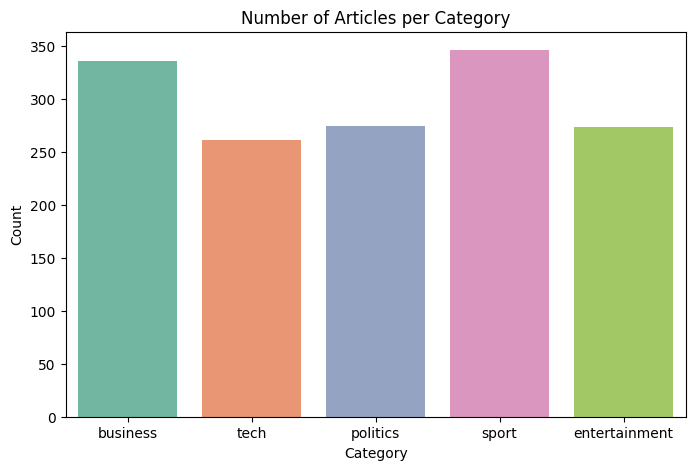

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category', data=df, palette='Set2')  # exact column name
plt.title('Number of Articles per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [28]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
df.head()

,ArticleId,Text,Category,word_count
0,1833,worldcom ex-boss launches defence lawyers defe...,business,301
1,154,german business confidence slides german busin...,business,325
2,1101,bbc poll indicates economic gloom citizens in ...,business,514
3,1976,lifestyle governs mobile choice faster bett...,tech,634
4,917,enron bosses in $168m payout eighteen former e...,business,355


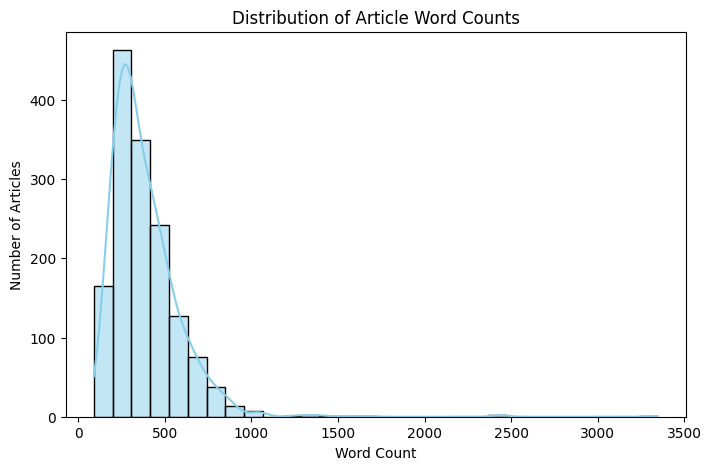

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Article Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.show()

/tmp/ipython-input-3634088738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='word_count', data=df, palette='Set3')


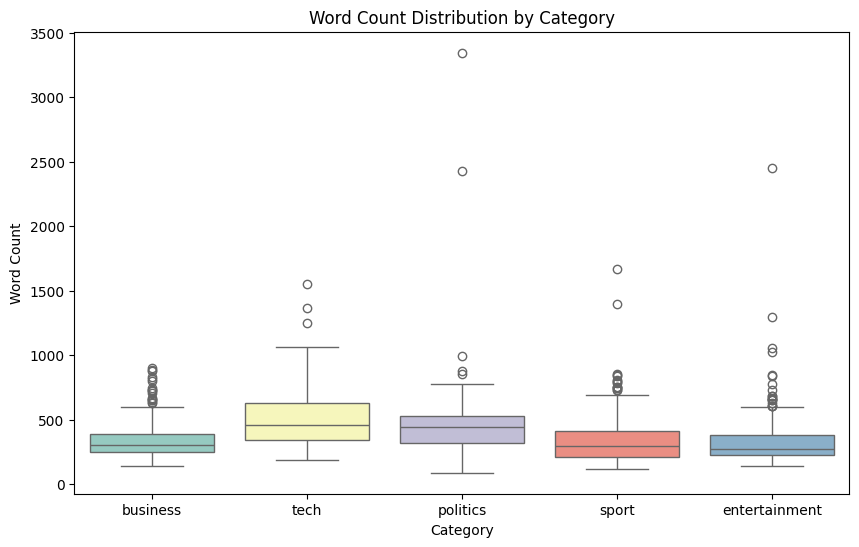

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='word_count', data=df, palette='Set3')
plt.title('Word Count Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()